# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'C:\\dev_python\\pydata-book-1st-edition'

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## A brief matplotlib API primer

In [5]:
import matplotlib.pyplot as plt
#그림 관련 함수들 존재

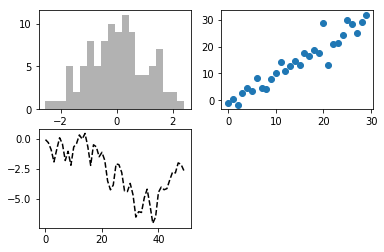

In [18]:
### Figures and Subplots

fig = plt.figure() #가장 먼저 figure 객체 생성

ax1 = fig.add_subplot(2, 2, 1) #figure에 subplot 생성
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3) #2 x 2

from numpy.random import randn
#만약 특정 subplot을 지정하지 않고 plot를 하게되면 '가장 최근에 활성화된  subplot'에
#그림을 그리게 된다.
plt.plot(randn(50).cumsum(), 'k--')
#배열 한 개만 주게 되면, 그것은 y축에 대한 값이 된다.
#즉 배열의 index가 x축의 값 되고 value가 y축에 대한 값이 된다.

_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)#히스토그램(hist), alpha는 투명도?
#'_(밑줄)'은 객체를 받겠지만 쓰지는 않겠다는 뜻.

ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))#산정도(scatter)
#x축, y축 순서로 그림


In [19]:
print(fig)

Figure(432x288)


In [ ]:
plt.close('all')    # matlplotlib inline 에서는 close() 필요없음
#현재 그림은 냅두고 별도의 figure에서 그림을 그렸을 때, 그 figure를 닫을때 close를 사용
# 'all'은 모든 창을 닫을 때

In [ ]:
fig, axes = plt.subplots(2, 3) #하나의 figure 객체와, 2 x 3 subplot 객체를 반환
axes
plt.plot(randn(50))
#### Adjusting the spacing around subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

In [27]:
InteractiveShell.ast_node_interactivity = 'last'    # 별도의 셀에서 수행되어야 함

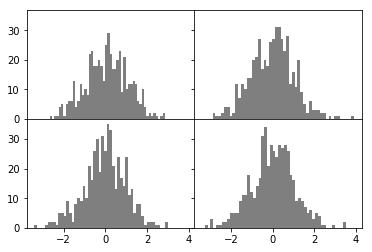

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

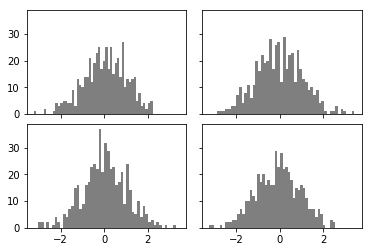

In [39]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

### Colors, markers, and line styles

array([-1.4803, -2.0156, -2.6082, -3.5598, -3.969 , -4.3158, -5.5662,
       -5.2536, -3.3717, -5.039 , -5.859 , -5.1153, -5.586 , -4.5048,
       -4.399 , -3.1252, -2.4445, -2.3356, -2.677 , -4.2176, -2.0148,
       -1.3208, -2.2712, -2.0761, -2.8218, -3.2089, -3.6777, -4.9069,
       -5.55  , -5.0959])

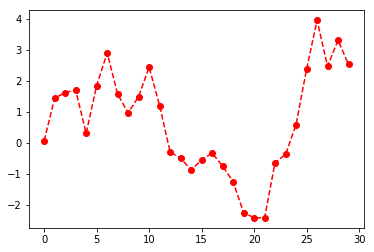

In [54]:
plt.figure()
randn(30).cumsum()
plt.plot(randn(30).cumsum(), 'ro--') #생상/마커/선모양

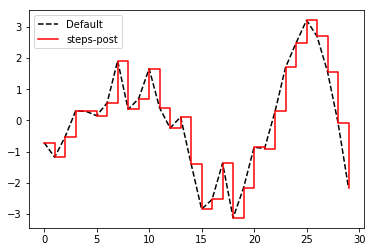

In [71]:
data = randn(30).cumsum() #cumsum(): 누적합
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
#post(뒤를 의미) 따라서 뒷 계단 형식
plt.legend(loc='best')#legend(범례를 뜻 함, best는 최적의 위치를 알아서 찾음
#left, right가 있음

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5,1,'My first matplotlib plot')

Text(0.5,0,'Stages')

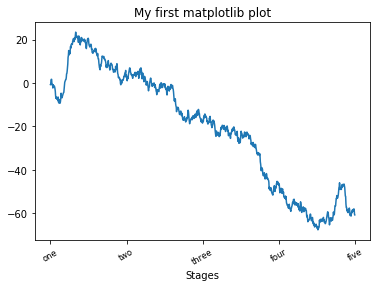

In [72]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum()) #누적합

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') #rotation=s30도 회전
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

TypeError: must be real number, not datetime.datetime

TypeError: must be real number, not datetime.datetime

TypeError: must be real number, not datetime.datetime

(732677.0, 734138.0)

(600, 1800)

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

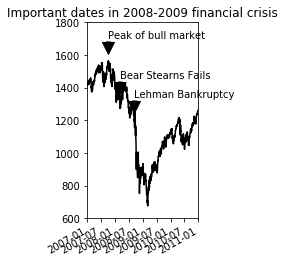

In [91]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

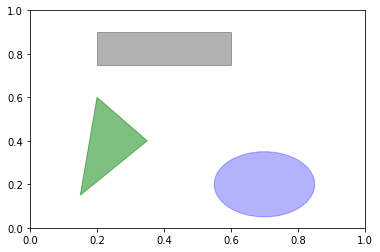

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

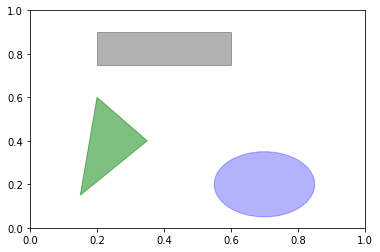

In [80]:
fig

In [81]:
fig.savefig('figpath.svg')

In [82]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [83]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [92]:
#plt.rc('figure', figsize=(10, 10))
# default size: (6, 4)
plt.rc('figure', figsize=(6, 4))

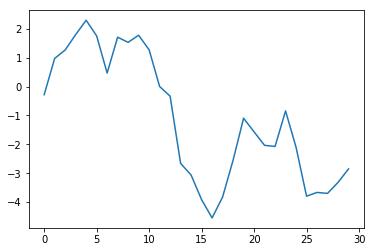

In [93]:
data = randn(30).cumsum()
plt.plot(data)

## Plotting functions in pandas

### Line plots

In [94]:
plt.close('all')

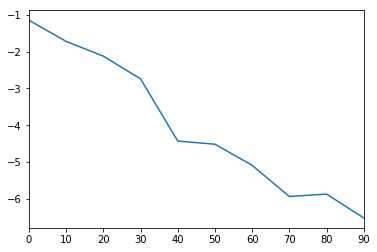

In [95]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [96]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.836240,0.930089,0.266978,0.458977
10,1.235124,1.289969,0.745729,-0.730267
20,2.934205,0.989819,2.956545,1.506577
30,3.637957,2.921797,3.285660,0.936969
40,3.193100,6.192374,4.544462,1.091987
50,3.201474,6.155355,6.322546,1.254046
60,2.673207,6.669725,4.611836,0.694760
70,2.093291,7.332837,5.260782,1.267892
80,2.095232,8.530733,4.703303,0.541579
90,0.598513,10.540266,4.447364,1.486739


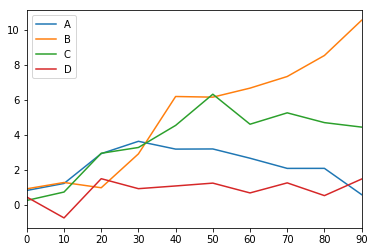

In [97]:
df.plot()

### Bar plots

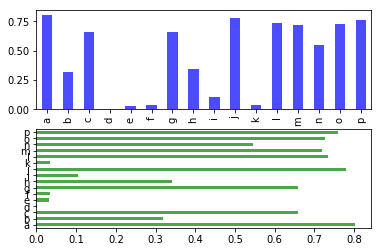

In [98]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)

Genus,A,B,C,D
one,0.426041,0.246794,0.575776,0.614403
two,0.614575,0.963365,0.925501,0.876469
three,0.862791,0.558118,0.375731,0.878238
four,0.078312,0.336163,0.522694,0.299430
five,0.130058,0.621055,0.063516,0.938162
six,0.630472,0.984358,0.425696,0.995604


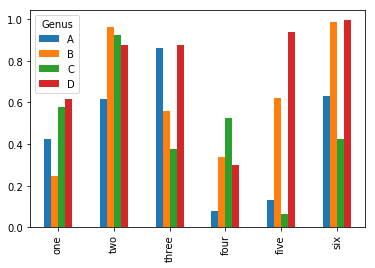

In [99]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [ ]:
#plt.figure()

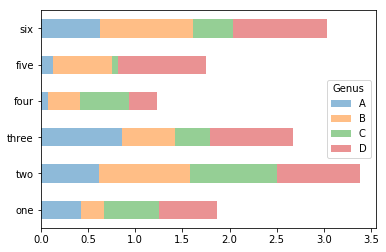

In [103]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [104]:
InteractiveShell.ast_node_interactivity = 'all'

In [105]:
tips = pd.read_csv('ch08/tips.csv')
#party_counts = pd.crosstab(tips.day, tips.size)  # tips.size 에서 오류
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts
# Not many 1- and 6-person parties
#party_counts = party_counts.ix[:, 2:5]
party_counts = party_counts.loc[:, 2:5]    # 여기서 2:5는 index가 아니고 label임, 5도 포함됨
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


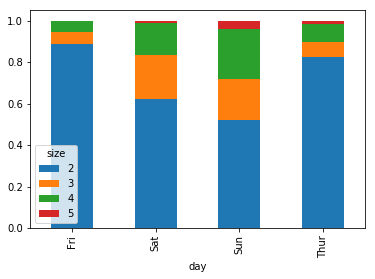

In [106]:
# Normalize to sum to 1
#party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [ ]:
#plt.figure()

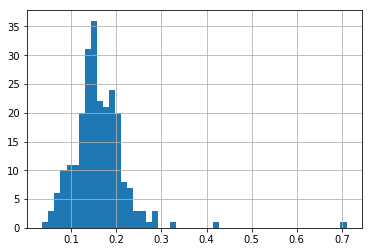

In [107]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [ ]:
#plt.figure()

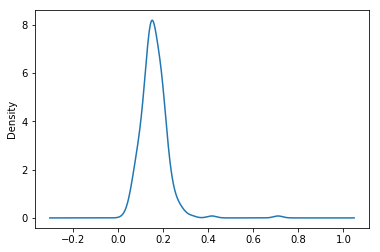

In [108]:
tips['tip_pct'].plot(kind='kde')

In [ ]:
#plt.figure()

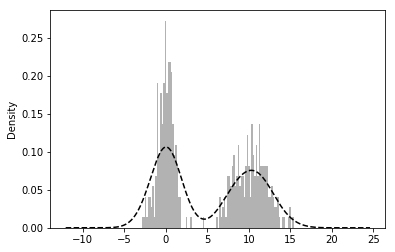

In [109]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [114]:
np.log(data).diff().tail(5)

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [110]:
macro = pd.read_csv('ch08/macrodata.csv')
macro.tail(5)    # 추가
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.tail(5)    # 추가
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
trans_data.tail(5)    # 추가

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


,cpi,m1,tbilrate,unemp
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2
202,216.385,1673.9,0.12,9.6


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
#plt.figure()

Text(0.5,1,'Changes in log m1 vs. log unemp')

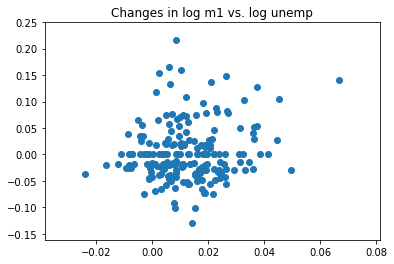

In [111]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

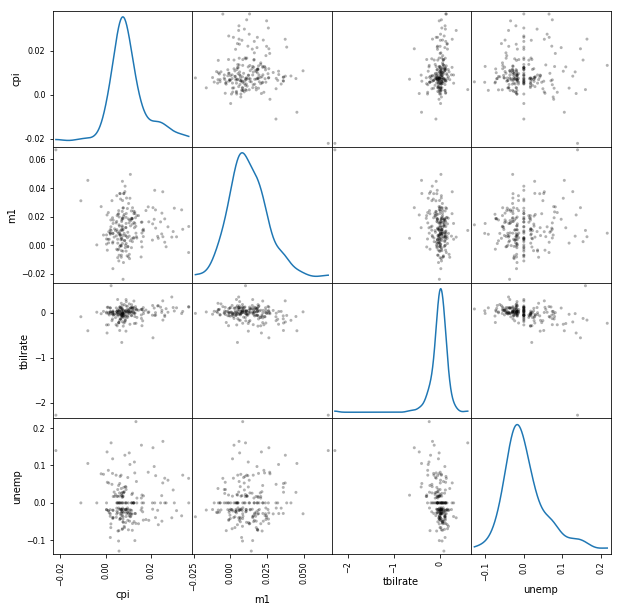

In [112]:
plt.rc('figure', figsize=(10, 10))
#pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)   # 변경
plt.rc('figure', figsize=(6, 4));

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [ ]:
data = pd.read_csv('ch08/Haiti.csv')
data[:5]
data.info()

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
data['CATEGORY'][:6]

In [ ]:
data.describe()

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]
data.head(5)
data.info()

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

In [ ]:
data.CATEGORY.head(5)

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:5]
len(all_cats)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
all_codes[:10]
code_index = pd.Index(np.unique(all_codes))
code_index
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.info()

In [ ]:
len(all_codes)
len(np.unique(all_codes))

In [ ]:
dummy_frame.head()

In [ ]:
#dummy_frame.ix[:, :6].info()
dummy_frame.iloc[:, :6].info()

In [ ]:
data.index[:5]
data.CATEGORY.head()

In [ ]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    #dummy_frame.ix[row, codes] = 1
    dummy_frame.loc[row, codes] = 1
dummy_frame.head()

In [ ]:
data = data.join(dummy_frame.add_prefix('category_'))
data.head(5)

In [ ]:
#data.ix[:, 10:15].info()
data.iloc[:, 10:15].info()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'r.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        
make_plot()        

In [ ]:
plt.rc('figure', figsize=(12, 10))
fig = plt.figure()
cat_data = data[data['category_2a'] == 1]
lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

m = basic_haiti_map(lllat=33, urlat=39,
                    lllon=125, urlon=133)
#shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
#m.readshapefile(shapefile_path, 'roads')
x, y = m(lons.values, lats.values)

m.plot(x, y, 'k.', alpha=0.5)
fig.get_axes()[0].set_title('Food shortages reported in Port-au-Prince')